## 1. Course detail data

### 1.1 Data manipulation and exploration for course detail data

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sqlite3 as sql
%matplotlib inline

In [40]:
## use sql to connect data.db
dire = os.getcwd()
db = sql.connect(dire+"/data.db")
cursor = db.execute("SELECT * FROM sqlite_master")
cursor.fetchall()

[('table',
  'courseCRN',
  'courseCRN',
  4,
  'CREATE TABLE "courseCRN" (\n"CRN" TEXT,\n  "Course" TEXT\n)'),
 ('table',
  'deptID',
  'deptID',
  186,
  'CREATE TABLE "deptID" (\n"did" TEXT,\n  "dname" TEXT\n)'),
 ('table',
  'coursedtl',
  'coursedtl',
  187,
  'CREATE TABLE "coursedtl" (\n"Available" TEXT,\n  "CRN" TEXT,\n  "Final" TEXT,\n  "Form_GE" TEXT,\n  "Instructor" TEXT,\n  "Maximum_seat" TEXT,\n  "New_GE" TEXT,\n  "cname" TEXT,\n  "course" TEXT,\n  "location" TEXT,\n  "subject" TEXT,\n  "term" TEXT,\n  "time" TEXT,\n  "unit" TEXT,\n  "wkday" TEXT\n)'),
 ('table',
  'location',
  'location',
  1023,
  'CREATE TABLE "location" (\n"location" TEXT,\n  "northeast" TEXT,\n  "southwest" TEXT,\n  "represent" TEXT,\n  "nlat" REAL,\n  "nlon" REAL,\n  "slat" REAL,\n  "slon" REAL,\n  "rlat" REAL,\n  "rlon" REAL\n)'),
 ('table',
  'textbook',
  'textbook',
  2,
  'CREATE TABLE "textbook" (\n"term" TEXT,\n  "coursename" TEXT,\n  "coursesection" TEXT,\n  "Instructor" TEXT,\n  "courseid" 

In [41]:
pd.read_sql("SELECT * FROM sqlite_master", db)

,type,name,tbl_name,rootpage,sql
0,table,courseCRN,courseCRN,4,"CREATE TABLE ""courseCRN"" (\n""CRN"" TEXT,\n ""Co..."
1,table,deptID,deptID,186,"CREATE TABLE ""deptID"" (\n""did"" TEXT,\n ""dname..."
2,table,coursedtl,coursedtl,187,"CREATE TABLE ""coursedtl"" (\n""Available"" TEXT,\..."
3,table,location,location,1023,"CREATE TABLE ""location"" (\n""location"" TEXT,\n ..."
4,table,textbook,textbook,2,"CREATE TABLE ""textbook"" (\n""term"" TEXT,\n ""co..."
5,table,deptabb,deptabb,9,"CREATE TABLE ""deptabb"" (\n""Subject_Code"" TEXT,..."
6,table,course_distinct,course_distinct,8,"CREATE TABLE course_distinct(CRN TEXT,wkday TEXT)"


In [42]:
## read the course detail data in pandas and name it as course
course = pd.read_sql("SELECT * FROM coursedtl", db)

## rename some columns and change data into suitable formats
course.rename(columns={'Available': 'Available_seats','Final': 'Final Exam','Form_GE': 'Former GE','Maximum_seat':'Maximum_seats','New_GE':'New GE','cname':'course name','course':'course_title','wkday':'weekday'}, inplace=True)
course['Available_seats'] = pd.to_numeric(course['Available_seats'])
course['Maximum_seats'] = pd.to_numeric(course['Maximum_seats'])


In [43]:
## select first three letters from course as department and insert this as a column into course data
department = list()
for i in range(len(course['course_title'])):
    append = course['course_title'][i][0:3]
    department.append(append)
course.insert(0,'Department',department)

In [44]:
course.head()

,Department,Available_seats,CRN,Final Exam,Former GE,Instructor,Maximum_seats,New GE,course name,course_title,location,subject,term,time,unit,weekday
0,AAS,6,74279,"Thursday, March22 at 830 pm",Arts & Humanities Diversity Writing Experience,Jeramy Decristo,55,"American Cultures, Governance & History Arts &...",Int Afr Amer Humanities,AAS 015 001,Wellman Hall 230,African American & African Std,"Winter Quarter, 2018",6:10 - 7:20 PM,4,T
1,AAS,6,74279,"Thursday, March22 at 830 pm",Arts & Humanities Diversity Writing Experience,Jeramy Decristo,55,"American Cultures, Governance & History Arts &...",Int Afr Amer Humanities,AAS 015 001,Wellman Hall 230,African American & African Std,"Winter Quarter, 2018",6:10 - 7:20 PM,4,R
2,AAS,6,74279,"Thursday, March22 at 830 pm",Arts & Humanities Diversity Writing Experience,Jeramy Decristo,55,"American Cultures, Governance & History Arts &...",Int Afr Amer Humanities,AAS 015 001,Wellman Hall 230,African American & African Std,"Winter Quarter, 2018",7:30 - 8:00 PM,4,T
3,AAS,6,74279,"Thursday, March22 at 830 pm",Arts & Humanities Diversity Writing Experience,Jeramy Decristo,55,"American Cultures, Governance & History Arts &...",Int Afr Amer Humanities,AAS 015 001,Wellman Hall 230,African American & African Std,"Winter Quarter, 2018",7:30 - 8:00 PM,4,R
4,AAS,20,40181,"Tuesday, March20 at 600 pm",Arts & Humanities Diversity Writing Experience,Elizabeth Mukiibi,60,Arts & Humanities Visual Literacy World Cultures,African Verbal Arts,AAS 016 001,Wellman Hall 212,African American & African Std,"Winter Quarter, 2018",12:10 - 2:00 PM,4,M


In [45]:
course.shape

(13766, 16)

In [46]:
course.dtypes

Department         object
Available_seats     int64
CRN                object
Final Exam         object
Former GE          object
Instructor         object
Maximum_seats       int64
New GE             object
course name        object
course_title       object
location           object
subject            object
term               object
time               object
unit               object
weekday            object
dtype: object

In [47]:
course.isna().any()

Department         False
Available_seats    False
CRN                False
Final Exam         False
Former GE          False
Instructor         False
Maximum_seats      False
New GE              True
course name        False
course_title       False
location           False
subject            False
term               False
time               False
unit               False
weekday            False
dtype: bool

In [48]:
course.describe()

,Available_seats,Maximum_seats
count,13766.000000,13766.000000
mean,5.124074,33.240883
std,13.115531,35.367735
min,-255.000000,0.000000
25%,0.000000,20.000000
50%,2.000000,25.000000
75%,6.000000,35.000000
max,305.000000,650.000000


Although New Ge contains NA, it will not influence our analysis.

### 1.2 Data analysis for course detail data
### (a) Number of courses in each department ---  determine popular departments

In [49]:
## delete rows with repeat CRNs and name it as course1
course1 = course
course1 = course1.drop_duplicates(subset='CRN', keep = 'first')

In [50]:
course1.shape

(3921, 16)

In [51]:
course1.describe()

,Available_seats,Maximum_seats
count,3921.000000,3921.000000
mean,6.251211,36.052283
std,15.138658,42.950839
min,-255.000000,0.000000
25%,0.000000,20.000000
50%,2.000000,25.000000
75%,8.000000,36.000000
max,305.000000,650.000000


In [52]:
## count number of courses in each department 
count = course1['course name'].groupby(course1['Department']).count()
count = count.sort_values(ascending = False)
count.head()

Department
CHE    268
PHY    191
UWP    189
MAT    174
ECN    162
Name: course name, dtype: int64

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


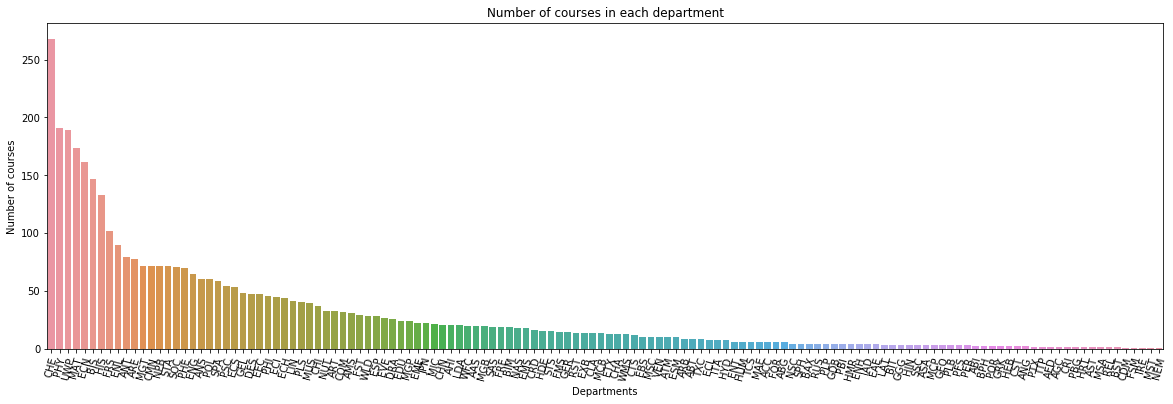

In [53]:
## Draw plots of number of courses in each department
plt.figure(figsize=(20,6))
dep = sns.barplot(x = count.index, y = count)
dep.set(title = "Number of courses in each department", xlabel = "Departments", ylabel = "Number of courses")
dep.set_xticklabels(dep.get_xticklabels(), rotation = 75)
plt.show()

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


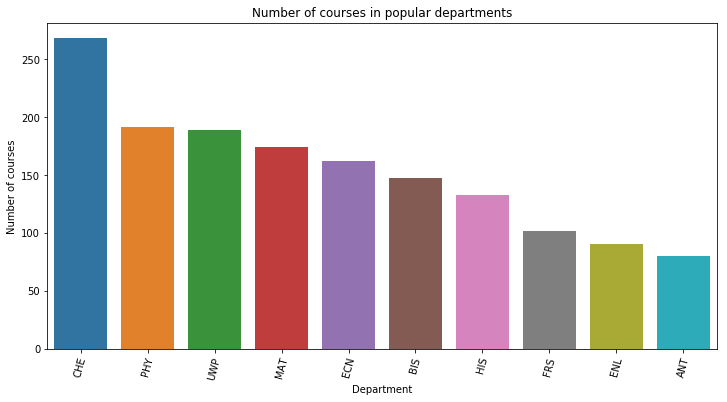

In [54]:
## define popular departments 
popular_dep = count[count >= 80].sort_values(ascending = False)

## draw plots of popular departments
plt.figure(figsize=(12,6))
dep = sns.barplot(x = popular_dep.index, y = popular_dep)
dep.set(title = "Number of courses in popular departments", xlabel = "Department", ylabel = "Number of courses")
dep.set_xticklabels(dep.get_xticklabels(), rotation = 75)
plt.show()

We calculate number of courses in each department and define those who have largest number of courses as popular departments. We also draw barplot of number of courses in each department.From the plot we can see that department of **Chemistry, Physics, Writing Program, Mathematics and Economics** are popular departments.

### (b) Number of each course --- determine popular courses

#### (1) Determine popular courses based on course frequncies¶

In [56]:
## Determine popular courses based on course frequncies
count = course1['course name'].groupby(course1['course name']).count()
popular_course = count[count >= 15].sort_values(ascending = False)
popular_course

course name
 General Chemistry          132
 General Physics            110
 Introduction to Biology    108
 First-Year Seminar         102
 Calculus                    56
 Organic Chem Health Sci     53
 Classical Physics           41
 Calculus for BioSci         39
 Advancd Multiling Wrtng     32
 Cultural Anthropology       30
 Princ Of Microecon          28
 History Of The U S          27
 Expository Writing          27
 Seminar                     27
 Organic Chemistry-Brief     25
 Advanced Composition        25
 Data Visualization          24
 Elementary Spanish          24
 Video Games and Culture     24
 Food and History            24
 Intro To Literature         24
 Intrmed Multiling Wrtng     22
 Animal Prac/Dairy           21
 Genes and Gene Exp Disc     21
 Princ Of Macroecon          20
 Human Gross Anatomy Lab     20
 19th-20th Century World     18
 Intro Linguistics           18
 Business Writing            18
 Intro Public Speaking       18
 College Writing-SCC157S    

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


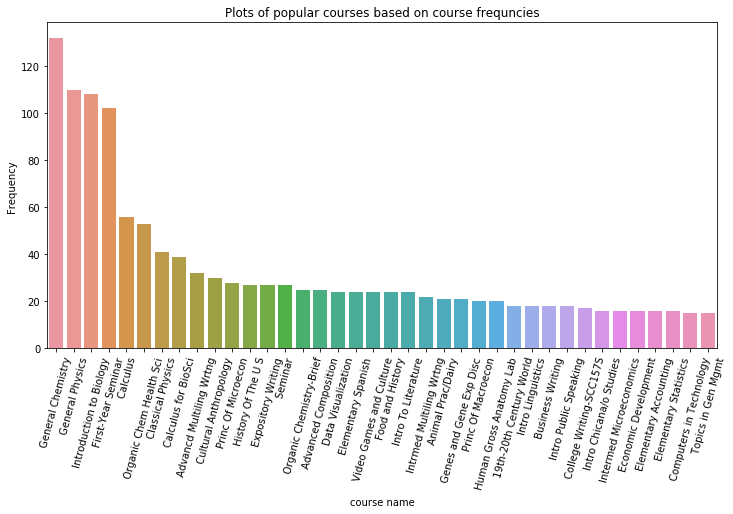

In [57]:
## Draw plots of popular courses based on course frequncies 
plt.figure(figsize=(12,6))
dep = sns.barplot(x = popular_course.index, y = popular_course)
dep.set(title = "Plots of popular courses based on course frequncies", xlabel = "course name", ylabel = "Frequency")
dep.set_xticklabels(dep.get_xticklabels(), rotation = 75)
plt.show()

#### (2) Determine popular courses based on maximum seats of courses

In [58]:
## Determine popular courses based on maximum students seats  
course1['Maximum_seats'] = pd.to_numeric(course1['Maximum_seats'])
course1['Available_seats'] = pd.to_numeric(course1['Available_seats'])
count = course1['Maximum_seats'].groupby(course1['course name']).sum()
popular_course = count[count >= 1000].sort_values(ascending = False) 
popular_course

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


course name
 General Chemistry          3221
 Introduction to Biology    2592
 Calculus                   2310
 General Physics            1650
 Calculus for BioSci        1638
 Short Calculus             1580
 First-Year Seminar         1559
 Organic Chem Health Sci    1495
 Seminar                    1223
 General Psychology         1166
 Human Gross Anatomy        1012
Name: Maximum_seats, dtype: int64

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


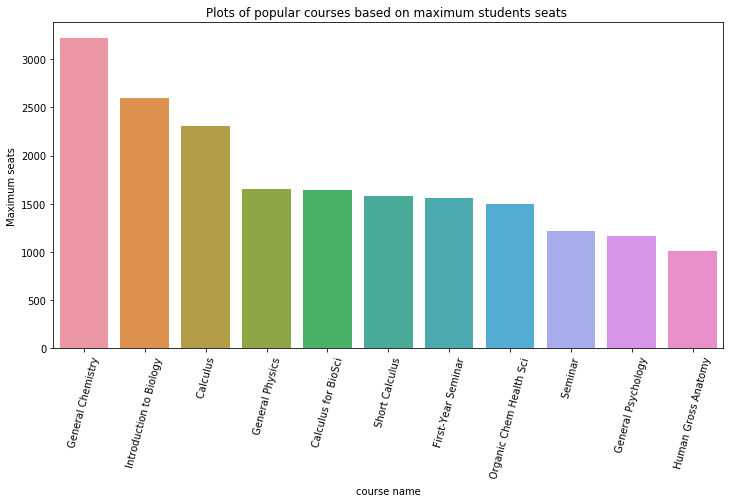

In [59]:
## Draw plots of popular courses based on maximum students seats  
plt.figure(figsize=(12,6))
dep = sns.barplot(x = popular_course.index, y = popular_course)
dep.set(title = "Plots of popular courses based on maximum students seats ", xlabel = "course name", ylabel = "Maximum seats")
dep.set_xticklabels(dep.get_xticklabels(), rotation = 75)
plt.show()

#### (3) Determine popular courses based on maximum seats of courses and available seats

In [60]:
## Determine popular courses based on maximum students seats and available seats 
count1 = course1['Available_seats'].groupby(course1['course name']).sum()
count2 = count - count1
popular_course = count2[count2 > 1000].sort_values(ascending = False) 
popular_course

course name
 General Chemistry          3144
 Introduction to Biology    2466
 Calculus                   2070
 General Physics            1487
 First-Year Seminar         1433
 Calculus for BioSci        1401
 Organic Chem Health Sci    1274
 Short Calculus             1263
 General Psychology         1117
 Discov & Concepts          1113
dtype: int64

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


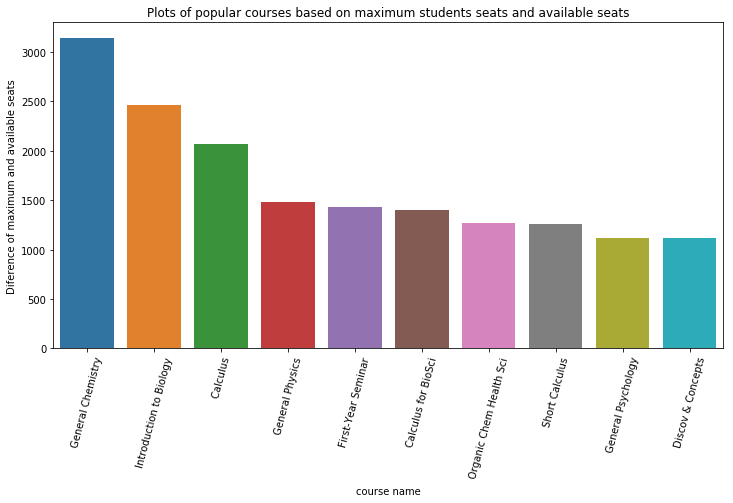

In [61]:
## Draw plots of popular courses based on maximum students seats and available seats 
plt.figure(figsize=(12,6))
dep = sns.barplot(x = popular_course.index, y = popular_course)
dep.set(title = "Plots of popular courses based on maximum students seats and available seats", xlabel = "course name", ylabel = "Diference of maximum and available seats")
dep.set_xticklabels(dep.get_xticklabels(), rotation = 75)
plt.show()

Here we use three strategies to define popular courses.  
The first one is based on course frequency, the second one is based on maximum seats of courses and the last one is based on both maximum and available seats of courses. We also draw three plots of popular courses.  
From these plots we can conclude that **General Chemistry, General Physics, Calculus, Calculus for Biology Science and Introduction to Biology** are popular courses.  
Moreover, results in these three plots are consistent with each other.

### (c) Course distribution 

The third aspect we are interested in is courses distribution.  
We focus on three dimensions: weekday, time and location.

#### (1) Course distribution based on weekday

In [62]:
course_distinct = pd.read_sql(" SELECT CRN, wkday FROM coursedtl",db)

In [63]:
## count number of courses on different days 
count = course['weekday'].groupby(course['weekday']).count()
count = count.sort_values(ascending = False)
count = count.drop(labels = ['','A'])
count = count.rename(index = {'T':'Tuesday','M':'Mondday','R':'Thursday','F':'Friday','W':'Wednesday','S':'Saturday','U':'Sunday'})
count

weekday
Tuesday      2577
Mondday      2272
Thursday     2145
Friday       1701
Wednesday    1407
Saturday       20
Sunday          9
Name: weekday, dtype: int64

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


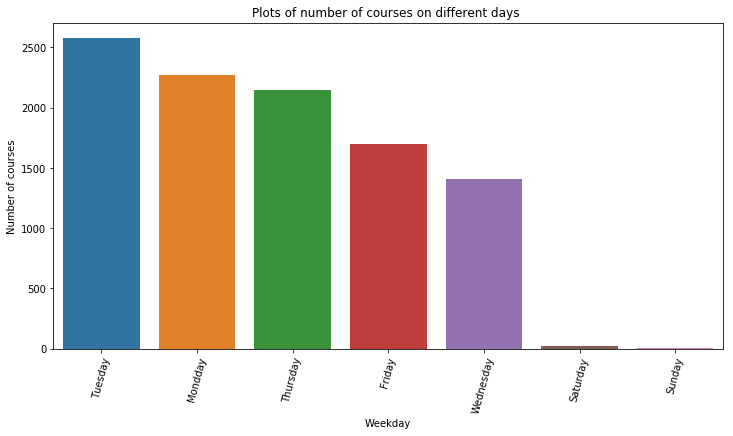

In [64]:
## Draw plots of number of courses on different days 
plt.figure(figsize=(12,6))
dep = sns.barplot(x = count.index, y = count)
dep.set(title = "Plots of number of courses on different days ", xlabel = "Weekday", ylabel = "Number of courses")
dep.set_xticklabels(dep.get_xticklabels(), rotation = 75)
plt.show()

Firstly we calculate number of courses on different days and draw the barplot.  
From the plot we can see that on **Tuesday**, number of courses is the largest. 

#### (2) Course distribution based on time and location

In [65]:
from folium.plugins import HeatMap
import folium
import vincent, json
import numpy as np
from ipywidgets import interact
from folium.plugins import MeasureControl

In [66]:
## prepare the data
data = pd.read_sql("SELECT SUM(a.Maximum_seat-a.Available) number_of_students,a.cname,a.location,a.time,a.wkday,b.rlat,b.rlon FROM coursedtl a\
            LEFT JOIN location b\
            ON a.location = b.location \
            GROUP BY a.location,a.time,a.wkday \
            HAVING wkday<>'' AND rlat>0 AND time NOT LIKE '%TBA%' ORDER BY number_of_students DESC",db)

In [67]:
wk = {"M":1,"T":2,"W":3,"R":4,"F":5,"S":6,"U":7}
tm = {"1":"13","2":"14","3":"15","4":"16","5":"17","6":"18","7":"19","8":"20","9":"21"}
twlf = {0:12}

In [68]:
data['wkday'].replace(wk, inplace=True)

data = data.join(data['time'].str.split(':', 1, expand=True).rename(columns={0:'beginhr', 1:'remain'}))
data = data.join(data['remain'].str.split('-', 1, expand=True).rename(columns={0:'beginm', 1:'end'}))
data = data.join(data['end'].str.split(':', 1, expand=True).rename(columns={0:'endhr', 1:'endm'}))

data['endhr'].replace(twlf, inplace=True)
data['beginhr'].replace(twlf, inplace=True)
data['endhr'] = data['endhr'].str.replace(" ", "")
data['beginhr'] = data['beginhr'].str.replace(" ", "")
i = data.loc[data.end.str.contains("PM")].index
data.loc[i,"beginhr"] = data.loc[i,"beginhr"].replace(tm)
data.loc[i,"endhr"] = data.loc[i,"endhr"].replace(tm)

data["endm"] = data.endm.str.replace(r"\s*([0-9]+)\s*[A|P]M",r"\1")

data["location"] = data.location.str.replace(r"([\s*[a-zA-Z]+]*)\s*[0-9]+[a-zA-Z]*",r"\1")

data = data[["number_of_students","cname","location","wkday","rlat","rlon","beginhr","beginm","endhr","endm"]]

data = data.apply(pd.to_numeric, errors='ignore')

In [69]:
data.head()

,number_of_students,cname,location,wkday,rlat,rlon,beginhr,beginm,endhr,endm
0,878,Human Gross Anatomy,Sciences Lecture Hall,1,38.539457,-121.755855,16,10,17,0
1,878,Human Gross Anatomy,Sciences Lecture Hall,4,38.539457,-121.755855,16,10,17,0
2,599,Organic Chemistry-Brief,Mondavi Center,5,38.534634,-121.748777,8,0,8,50
3,599,Organic Chemistry-Brief,Mondavi Center,1,38.534634,-121.748777,8,0,8,50
4,501,"Food, Folklore, & Health",Sciences Lecture Hall,4,38.539457,-121.755855,13,40,15,0


In [70]:
## write the function to show course distribution at different times ans locations
@interact(wkday=(0,7),begin=(0.0,23.5,0.5),end=(0.0,23.5,0.5))
def create_map(wkday = 0, begin = 0, end = 23.5):
    ## filter dataset according to the interaction value
    if wkday == 0:
        selected = data
    else:
        selected = data.loc[data.wkday == wkday,]
    bh = str(begin).split(".")[0]
    bm = str(begin).split(".")[1]
    eh = str(end).split(".")[0]
    em = str(end).split(".")[1]
    bm = "30" if bm =="5" else "0"
    bm = "30" if em =="5" else "0"
    selected = selected.loc[(selected.beginhr * 61 + selected.beginm >= (int(bh) * 61 + int(bm))) & 
                            (selected.endhr * 61 + selected.endm <= (int(eh) * 61 + int(em))),]
    
    ## draw a heatmap
    t = folium.Map(location=[38.541527, -121.749296], zoom_start=15)
    heat_datat = [[row['rlat'],row['rlon'],row["number_of_students"]] for index, row in selected.iterrows()]
    top10 = selected.groupby(['location'], as_index=False).agg({
                                                        "rlat":'first',
                                                        "rlon":'first',
                                                        "number_of_students":sum})
    max_amount = float(top10['number_of_students'].max())
    hm_wide = HeatMap(heat_datat,
                   min_opacity=0.3,
                   max_val=max_amount,
                   radius=15, blur=10, 
                   max_zoom=1) 
    t.add_child(hm_wide)
    
    ## add marker for buildings that contains most students
    top10 = top10.sort_values(by='number_of_students',ascending=0).head(10)
    for name, row in top10.iterrows():
        folium.Marker([row["rlat"], row["rlon"]],
                     popup="{0}: {1}".format(row["location"], row["number_of_students"])).add_to(t)
    text = 'During such period, there are '+str(sum(selected.number_of_students))+" students on campus"
    print(text)
    t.add_child(MeasureControl())
    t.save('map.html')
    return t

A Jupyter Widget

Course distribution can also be shown as student distribution. Those places with more studets are places who are holding more classes. Therefore in this part we draw the heatplot to show the student distribution.  
By clicking buttons to change different weekdays, beginning hours and ending hours, we can see student distribution directly. Note that if we choose weekday as 0, the plot shows the overall student distribution during a week.

## 2. Textbook data

### 2.1 Data manipulation and exploration for textbook data

In [71]:
import mpld3
from mpld3 import plugins

In [72]:
## read the textbook data in pandas 
text = pd.read_sql("SELECT * FROM textbook a LEFT JOIN deptabb b ON a.dname = b.Subject_Code", db)
text.head()

,term,coursename,coursesection,Instructor,courseid,book_needed,book_name,book_author,book_edition,book_pubtime,book_ISBN,dname,cno,Subject_Code,Transcript_Subject,Subject_Description
0,Winter 18,AAS 016,001,"Mukiibi, Elizabeth",40181,Required,DEATH+THE KING'S HORSEMAN,SOYINKA,75,1975,9780393322996,AAS,016,AAS,AF-AMST,African American & African Std
1,Winter 18,AAS 016,001,"Mukiibi, Elizabeth",40181,Required,TRIAL OF DEDAN KIMATHI,THIONG'0,13,2013,9781478611318,AAS,016,AAS,AF-AMST,African American & African Std
2,Winter 18,AAS 050,ALL,"WHITE, E",,Required,BEYOND BLACKFACE,BRUNDAGE,11,2011,9780807871843,AAS,050,AAS,AF-AMST,African American & African Std
3,Winter 18,AAS 050,ALL,"WHITE, E",,Required,"TOMS,COONS,MULATTOES,MAMMIES,+BUCKS",BOGLE,5TH 16,2016,9780826429537,AAS,050,AAS,AF-AMST,African American & African Std
4,Winter 18,AAS 100,ALL,,,Required,BEHIND THE WHITE PICKET FENCE,MAYORGA-GALLO,14,2014,9781469618630,AAS,100,AAS,AF-AMST,African American & African Std


In [73]:
## choose specific columns, rename some columns and name the data as textbook
textbook = text.iloc[:,[0,11,1,3,5,6,9,15]]
textbook.columns = ['term','department','coursename','Instructor','book_needed','book_name','pubyear','dept']
textbook.head()

,term,department,coursename,Instructor,book_needed,book_name,pubyear,dept
0,Winter 18,AAS,AAS 016,"Mukiibi, Elizabeth",Required,DEATH+THE KING'S HORSEMAN,1975,African American & African Std
1,Winter 18,AAS,AAS 016,"Mukiibi, Elizabeth",Required,TRIAL OF DEDAN KIMATHI,2013,African American & African Std
2,Winter 18,AAS,AAS 050,"WHITE, E",Required,BEYOND BLACKFACE,2011,African American & African Std
3,Winter 18,AAS,AAS 050,"WHITE, E",Required,"TOMS,COONS,MULATTOES,MAMMIES,+BUCKS",2016,African American & African Std
4,Winter 18,AAS,AAS 100,,Required,BEHIND THE WHITE PICKET FENCE,2014,African American & African Std


In [74]:
textbook.shape

(1569, 8)

In [75]:
textbook.dtypes

term           object
department     object
coursename     object
Instructor     object
book_needed    object
book_name      object
pubyear        object
dept           object
dtype: object

In [76]:
textbook.isnull().any()

term           False
department     False
coursename     False
Instructor     False
book_needed    False
book_name      False
pubyear        False
dept           False
dtype: bool

In [77]:
textbook.describe()

,term,department,coursename,Instructor,book_needed,book_name,pubyear,dept
count,1569,1569,1569,1569,1569,1569,1569,1569
unique,1,96,662,602,3,1231,75,96
top,Winter 18,ENL,ENL 003,TBD,Required,ETHICS & CORRUPTION,NA,English
freq,1569,229,75,96,1478,39,240,229


All columns do not contain NAs.

### 2.2 Data analysis for textbook data

#### (a) Textbook amounts in different departments

In [78]:
textbook_cnt = textbook.loc[:,["department","coursename","dept"]]
textbook_num = textbook_cnt.groupby('department').agg({
                                                        "coursename":"count",
                                                        "dept":'first'})
notextbook = pd.read_sql("SELECT Subject_Code,Subject_Description FROM deptabb",db)
havetextbook = set(textbook_num.index.values)
notextbook = notextbook[~notextbook["Subject_Code"].isin(havetextbook)]
notextbook.insert(loc = 1,column = "coursename",value = 0)
notextbook = notextbook.set_index('Subject_Code')
notextbook.index.name = "department"
notextbook.columns = ['coursename',"dept"]

textbook_withno = pd.concat([textbook_num,notextbook])
textbook_num = textbook_num.sort_values(by="coursename", ascending=False)

print(textbook_num.shape[0] / textbook_withno.shape[0])
notextbook.head()

0.24


,coursename,dept
department,,
ABG,0,Animal Biology Grad Gp
ABS,0,Applied Behavioral Sciences
ABT,0,Applied Biological System Tech
ADM,0,*Administration
ADS,0,*Administrative Studies


It shows that only 24% of departments use textbooks, which is a extremely small percentage. We guess it beacause some departments do not open courses or open only a few courses.

In [79]:
x = textbook_num.index.values
y = textbook_num['coursename'].values
fig = plt.figure(figsize=(12,5))
bars = sns.barplot(x,y)
bars.set(title = "Textbook Amounts in Each Departments", xlabel = "departments", ylabel = "textbooks amounts")
for i, bar in enumerate(bars.get_children()):
    if i == x.shape[0]:
        break
    else:
        tooltip = mpld3.plugins.LineLabelTooltip(bar, label=str(textbook_num.dept[i])+":"+str(y[i]))
        mpld3.plugins.connect(plt.gcf(), tooltip)
bars.set(xticklabels=[])
mpld3.display(fig)

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


We also calculate number of textbooks used in each department.  
From the plot we can see that those popular departments we find before are also departments who use textbooks most frequently.

What we also find is:

* Departments in Art tend to use more textbooks than others, which is a matter of course.
* Departments related to biology and medical uses ledd textboks than others.
* An intersting thing is that lingustic deparments uses less textbooks than science depatments like math, physics and chemisty. We guess it may because science departments open more courses. In order to verify our hypothesis, we can draw a ratio plot.

#### (b) Number and ratio of courses that have textbooks in each departments

In [80]:
## Screen the replicates in courses. The duplicates causes by different section of a certain course.
textbook_cor = textbook_cnt.drop_duplicates()
textbook_cor.head()

,department,coursename,dept
0,AAS,AAS 016,African American & African Std
2,AAS,AAS 050,African American & African Std
4,AAS,AAS 100,African American & African Std
7,AAS,AAS 107B,African American & African Std
9,AAS,AAS 181,African American & African Std


In [81]:
textbook_cor.shape

(662, 3)

In [82]:
textbook_corc = textbook_cor.groupby('department').agg({
                                                        "coursename":"count",
                                                        "dept":'first'})
textbook_corc = textbook_corc.sort_values(by="coursename", ascending=False)
textbook_corc.head()

,coursename,dept
department,,
HIS,34,History
ENL,28,English
CHE,27,Chemistry
PHY,21,Physics
MAT,21,Mathematics


In [83]:
## Draw plots of number of courses that have textbooks in each departments
x = textbook_corc.index.values
y = textbook_corc['coursename'].values
fig = plt.figure(figsize=(12,5))
dep = sns.barplot(x,y)
dep.set(title = "Number of Courses that Have Textbooks in Each Departments", xlabel = "departments", ylabel = "courses with textbooks")
dep.set(xticklabels=[])
for i, bar in enumerate(dep.get_children()):
    if i == x.shape[0]:
        break
    else:
        tooltip = mpld3.plugins.LineLabelTooltip(bar, label=str(textbook_corc.dept[i])+":"+str(y[i]))
        mpld3.plugins.connect(plt.gcf(), tooltip)
mpld3.display(fig)

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


In [84]:
## List of course
course = pd.read_sql("SELECT * FROM coursedtl", db)
course.head(3)

,Available,CRN,Final,Form_GE,Instructor,Maximum_seat,New_GE,cname,course,location,subject,term,time,unit,wkday
0,6,74279,"Thursday, March22 at 830 pm",Arts & Humanities Diversity Writing Experience,Jeramy Decristo,55,"American Cultures, Governance & History Arts &...",Int Afr Amer Humanities,AAS 015 001,Wellman Hall 230,African American & African Std,"Winter Quarter, 2018",6:10 - 7:20 PM,4,T
1,6,74279,"Thursday, March22 at 830 pm",Arts & Humanities Diversity Writing Experience,Jeramy Decristo,55,"American Cultures, Governance & History Arts &...",Int Afr Amer Humanities,AAS 015 001,Wellman Hall 230,African American & African Std,"Winter Quarter, 2018",6:10 - 7:20 PM,4,R
2,6,74279,"Thursday, March22 at 830 pm",Arts & Humanities Diversity Writing Experience,Jeramy Decristo,55,"American Cultures, Governance & History Arts &...",Int Afr Amer Humanities,AAS 015 001,Wellman Hall 230,African American & African Std,"Winter Quarter, 2018",7:30 - 8:00 PM,4,T


In [85]:
## Count number of courses in each department 
course_c = pd.concat([course['course'].str.split(expand=True)[1],course['course'].str.split(expand=True)[0]],axis=1)
course_c.columns = ['coursename','department']
course_c = course_c.drop_duplicates()
course_c.head()

,coursename,department
0,015,AAS
4,016,AAS
6,017,AAS
8,050,AAS
24,100,AAS


In [86]:
## Count the number of courses in each department
course_cnt = course_c.groupby('department').count()

In [87]:
course_ratio = pd.merge(course_cnt,textbook_corc, how='left',left_index=True, right_index=True)

dept = pd.read_sql("SELECT Subject_Code,Subject_Description FROM deptabb",db)

course_ratio = course_ratio.fillna(0)
course_ratio.columns = ['total_course',"have_textbook","dept"]
course_ratio = course_ratio[['total_course',"have_textbook"]]
course_ratio1 = course_ratio.merge(dept,how='left', right_on=['Subject_Code'],left_index=True)

In [88]:
## Calculate textbook ratio
course_ratio1["ratio"]= course_ratio1["have_textbook"]/course_ratio1["total_course"]
course_ratio1.head()

,total_course,have_textbook,Subject_Code,Subject_Description,ratio
0,11,5.0,AAS,African American & African Std,0.454545
1,3,0.0,ABG,Animal Biology Grad Gp,0.000000
2,3,1.0,ABI,Animal Biology,0.333333
4,6,0.0,ABT,Applied Biological System Tech,0.000000
5,5,5.0,ACC,Professional Accountancy,1.000000


In [89]:
## Draw plots of ratio of courses that have textbooks vs courses that don't have textbooks in each departments
textbook_rt = course_ratio1[course_ratio1.ratio > 0]
textbook_rt = textbook_rt.reset_index(drop=True)
textbook_rt = textbook_rt.sort_values(by="ratio", ascending=False)
x = textbook_rt['Subject_Code'].values
y = textbook_rt['ratio'].values
fig = plt.figure(figsize=(12,5))
dep = sns.barplot(x ,y)
dep.set(title = "ratio of courses with textbooks vs courses without textbooks in each departments", xlabel = "departments", ylabel = "ratio")
dep.set_xticklabels([])
for i, bar in enumerate(dep.get_children()):
    if i == x.shape[0]:
        break
    else:
        tooltip = mpld3.plugins.LineLabelTooltip(bar, label=str(textbook_rt.Subject_Description[i])+":"+str(y[i]))
        mpld3.plugins.connect(plt.gcf(), tooltip)
mpld3.display(fig)

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


We can find that science departments have lower ratio than that of linguistic departments. This result verifies our guess.

#### (c) The publish time of textbook in different departments/groups/overall

In [90]:
## Extract the departments and publish years and Drop the NA rows
textbook_time = pd.concat([textbook.iloc[:,1],textbook.iloc[:,6]],axis = 1)
textbook_time = textbook_time[~textbook_time.pubyear.str.contains("NA")]

In [91]:
textbook_time.head()
textbook_time1 = textbook_time.merge(dept,how='left', right_on=['Subject_Code'],left_on=['department'])
textbook_time1.head()

,department,pubyear,Subject_Code,Subject_Description
0,AAS,1975,AAS,African American & African Std
1,AAS,2013,AAS,African American & African Std
2,AAS,2011,AAS,African American & African Std
3,AAS,2016,AAS,African American & African Std
4,AAS,2014,AAS,African American & African Std


In [92]:
## Change the publisher year factors to intergers
textbook_time['pubyear'] = textbook_time['pubyear'].astype('int')

## Calculate the mean publish year of textbooks in each departments
textbook_timem = textbook_time.groupby('department').mean()
textbook_timem1 = textbook_timem.merge(dept,how='left', right_on=['Subject_Code'],left_index=True)
textbook_timem1.head()

,pubyear,Subject_Code,Subject_Description
0,2009.076923,AAS,African American & African Std
2,2015.000000,ABI,Animal Biology
5,2016.000000,ACC,Professional Accountancy
16,2005.333333,AHI,Art History
19,1998.666667,AMS,American Studies


/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


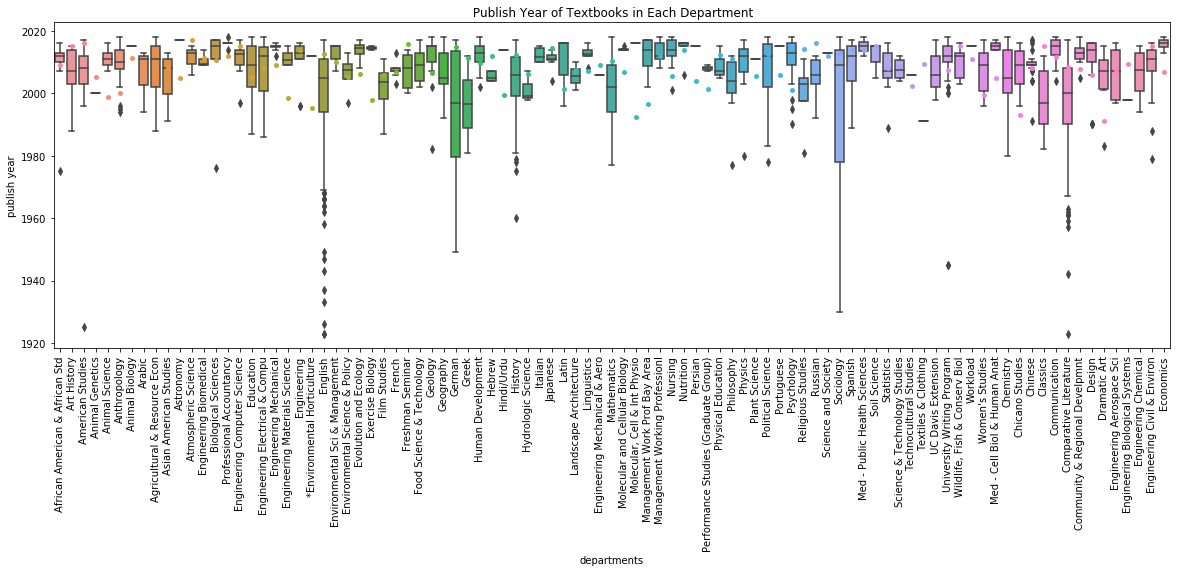

In [93]:
#Draw plots of mean publish year of textbooks in each department
textbook_time1 = textbook_time1.apply(pd.to_numeric, errors='ignore')
plt.figure(figsize=(20,6))
ax1 = sns.stripplot(x = textbook_timem1["Subject_Description"],y=textbook_timem1['pubyear'])
ax2 = sns.boxplot(x = textbook_time1['Subject_Description'],y=textbook_time1['pubyear'])

ax1.set(title = " Publish Year of Textbooks in Each Department", xlabel = "departments", ylabel = "publish year")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
plt.show()

From the plot we can conclude that for most departments, they use textbooks published mostly between year 2000 and 2017.

## 3. Rate my professor data

### 3.1 Data manipulation and exploration for rate my professor data

In [94]:
## Read the ratemyprofessor data and name it as rate
rate = pd.read_csv("regression/ratemyprofessor.csv",lineterminator='\n')
rate = rate.drop(['Unnamed: 0'], axis=1)
rate.head()

,Attendance,Class,Department,For Credit,Grade Received,Level of Difficulty,Overall Quality,Professor,RatingType,Textbook Used,Would Take Again,comment,comment tags,date
0,N/A,HIS188,the History department,Yes,N/A,3.0,5.0,Rauchway Eric,awesome,Yes,Yes,"No doubt, Rauchway is a solid lecturer and the...",[''],12/20/2017\r\r
1,Not Mandatory,HIS119,the History department,Yes,A,3.0,4.0,Rauchway Eric,good,Yes,Yes,Teaching a joint course with Prof. Campbell on...,"['BEWARE OF POP QUIZZES', 'RESPECTED', 'AMAZIN...",06/21/2017\r\r
2,Mandatory,HIS174B,the History department,Yes,N/A,3.0,2.0,Rauchway Eric,poor,Yes,No,He is unorganized and offers random in-class q...,"['PARTICIPATION MATTERS', 'TOUGH GRADER', ""SKI...",09/30/2016\r\r
3,Not Mandatory,HIS017B,the History department,Yes,A,3.0,4.0,Rauchway Eric,good,Yes,Yes,Pretty solid and entertaining lecturer. Howeve...,"['EXTRA CREDIT', 'GRADED BY FEW THINGS', 'GET ...",06/16/2016\r\r
4,Mandatory,HIS188,the History department,Yes,B+,3.0,4.5,Rauchway Eric,awesome,No,N/A,I really enjoyed the lectures. The books were ...,"['AMAZING LECTURES', 'CLEAR GRADING CRITERIA',...",12/31/2015\r\r


In [95]:
rate.shape

(21088, 14)

In [96]:
rate.dtypes

Attendance              object
Class                   object
Department              object
For Credit              object
Grade Received          object
Level of Difficulty    float64
Overall Quality        float64
Professor               object
RatingType              object
Textbook Used           object
Would Take Again        object
comment                 object
comment tags            object
date\r\r                object
dtype: object

In [97]:
rate.isna().any()

Attendance             False
Class                  False
Department             False
For Credit             False
Grade Received         False
Level of Difficulty    False
Overall Quality        False
Professor              False
RatingType             False
Textbook Used          False
Would Take Again       False
comment                 True
comment tags           False
date\r\r               False
dtype: bool

In [98]:
rate.describe()

,Level of Difficulty,Overall Quality
count,21088.000000,21088.000000
mean,3.094509,3.612623
std,1.207630,1.361255
min,1.000000,1.000000
25%,2.000000,2.500000
50%,3.000000,4.000000
75%,4.000000,5.000000
max,5.000000,5.000000


We can see that many columns have NAs, manipulation in NAs will be discussed in detail later in the linear regression model part.

### 3.2 Data analysis for rate my professor  data

#### (a) Calculate the ratio of number of student to number of professors

In [106]:
## Calculate number of professors of each course
prof_num = pd.read_sql("select count(DISTINCT(instructor)) As prof_num, cname from coursedtl group by cname", db)
prof_num = prof_num.rename(columns = {'prof_num':'number of professors of each course','cname':'coursename'})

In [107]:
## Calculate number of students of each course
stu_num = pd.read_sql("select sum(Maximum_seat)/count(DISTINCT wkday) a,course,cname from coursedtl  group by cname Having a > 0", db)
stu_num = stu_num.rename(columns = {'a':'number of students of each course','cname':'coursename'})

In [108]:
stu_num = stu_num.join(stu_num['course'].str.split(' ', 1, expand=True).rename(columns={0:'dept', 1:'remain'}))
stu_num = stu_num.join(stu_num['remain'].str.split(' ', 1, expand=True).rename(columns={0:'level', 1:'remains'}))

In [109]:
stu_num = stu_num[["number of students of each course","course","coursename","dept","level"]]
stu_num.head()

,number of students of each course,course,coursename,dept,level
0,25,RUS 122 001,19th C Rus Lit,RUS,122
1,216,HIS 010C A18,19th-20th Century World,HIS,010C
2,50,SPA 137N 001,20th C Spanish Fiction,SPA,137N
3,26,TCS 130 001,3D Computer Graphics,TCS,130
4,296,PSC 168 001,Abnormal Psych,PSC,168


In [110]:
## merge prof_num and stu_num by course_name
ratio_num = pd.merge(prof_num, stu_num, how = 'inner', on = 'coursename')

## calculate the ratio of number of student to number of professors of each course and insert a new column
ratio_num.insert(0,'ratio',ratio_num['number of professors of each course']/ratio_num['number of students of each course'])

In [111]:
## sort the ratio_num
ratio_num = ratio_num.sort_values(by = 'ratio', ascending = False)
ratio_num.head()

,ratio,number of professors of each course,coursename,number of students of each course,course,dept,level
281,0.500000,1,Contemporary Leadership,2,SAS 130 001,SAS,130
528,0.200000,1,Graduate Human Anatomy,5,CHA 200 001,CHA,200
1136,0.200000,2,Special Topics Art Hist,10,AHI 290 002,AHI,290
469,0.186898,97,First-Year Seminar,519,FRS 004 033,FRS,004
282,0.166667,3,Contemporary Performance,18,PFS 259 004,PFS,259


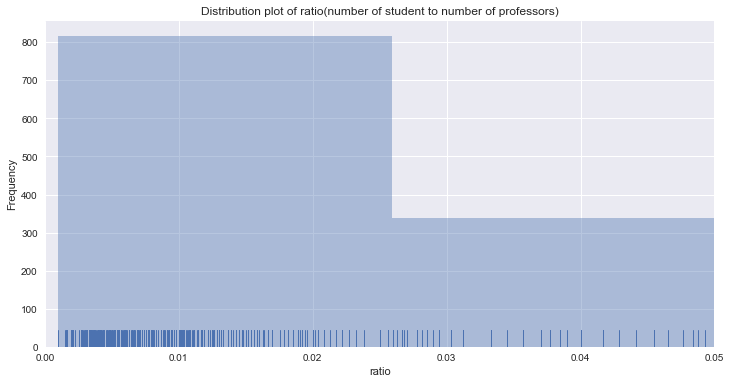

In [112]:
## Draw distribution plot of ratio(number of student to number of professors) 
plt.figure(figsize=(12,6))
sns.set(color_codes =True)
dep = sns.distplot(ratio_num['ratio'], bins=20, kde=False, rug=True)
dep.set_xlim([0,0.05])
dep.set(title = "Distribution plot of ratio(number of student to number of professors)", xlabel = 'ratio', ylabel = "Frequency")
plt.show()

From the distribution plot we can see that for most courses, the ratio is between **0 and 0.025**. We want to check what kind of depatments tend to have lower ratio.

In [113]:
## find departments with lower ratio 
ratio_num1 = ratio_num.loc[ratio_num.ratio<=0.25,]
rdep = ratio_num1.groupby(['dept'], as_index=False)['course'].count()
rdep = rdep.sort_values(by = 'course', ascending = False)
rdep = rdep.reset_index(drop=True)
rdep = rdep.loc[0:20]

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


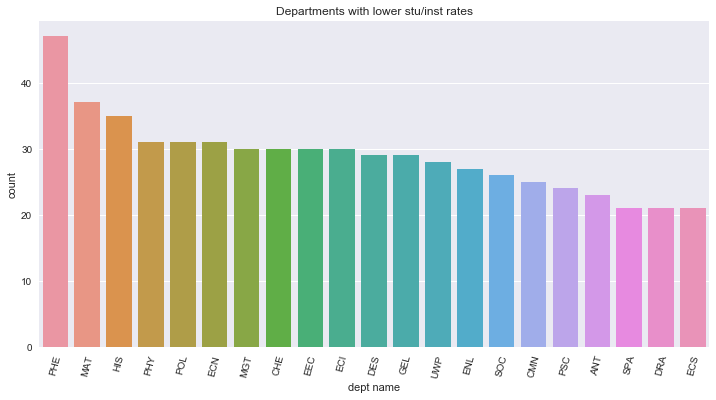

In [114]:
## Draw plot departments with lower ratio 
plt.figure(figsize=(12,6))
dep = sns.barplot(x = rdep.dept, y = rdep.course)
dep.set(title = "Departments with lower stu/inst rates", xlabel = "dept name", ylabel = "count")
dep.set_xticklabels(dep.get_xticklabels(), rotation = 75)
plt.show()

We can find **Physical Education, Mathematics, History, Physics and Political Science** has smallest ratio. Compared it to the plot of popular departments, we can find that there is a **negative relationship** between popular departments and the ratio. Taht is, more popular the department is, smaller the ratio is. However, among the popular departments, we can also conclude that in similar extent of popularity, departments in arts tend to have a smaller ratio than that in science.

#### (b) Analysis of Overall Quality

In [104]:
## calculate quality mean of each department and select department which get quality mean larger than 4.55
count = rate['Overall Quality'].groupby(rate['Department']).mean()
count = count[count > 4.55].sort_values(ascending = False) 
count

Department
the Russian department                          5.000000
the Learning Center department                  4.988095
the Electrical  Comp. Engineering department    4.916667
the Cultural Studies department                 4.875000
the Human Ecology department                    4.818182
the Italian department                          4.723404
the Japanese department                         4.709302
the Judaic Studies department                   4.625000
the Physical Ed department                      4.593220
the Physical Educ                               4.568182
the MolecularCellular Biology department        4.555556
Name: Overall Quality, dtype: float64

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


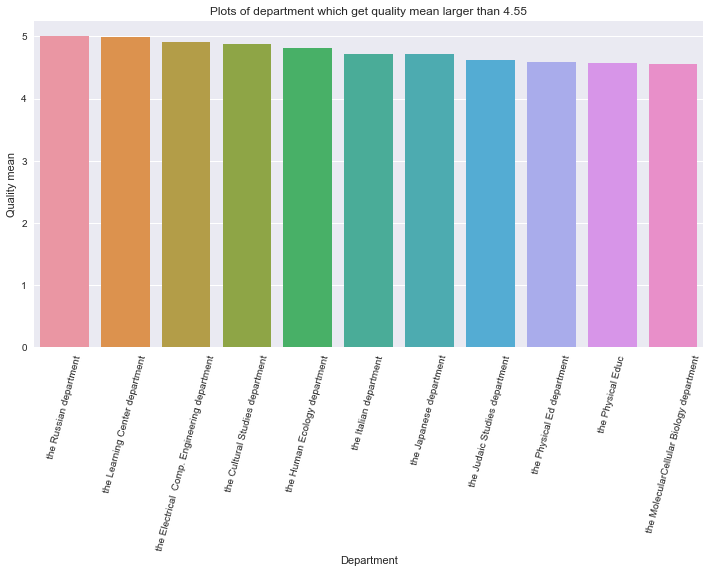

In [105]:
## Draw plots of department which get quality mean larger than 4.55  
plt.figure(figsize=(12,6))
dep = sns.barplot(x = count.index, y = count)
dep.set(title = "Plots of department which get quality mean larger than 4.55", xlabel = 'Department', ylabel = "Quality mean")
dep.set_xticklabels(dep.get_xticklabels(), rotation = 75)
plt.show()

Overall quality shows how students are satisfied with the courses.  
Larger the value is, more satisfied are the students.  
Here we pick up departments with overall mean quality larger than 4.55  .

Later we will build a linear regression model on the rate my professor data, which can be found in Linear Regression Model-ratemyprofessor-V6.ipynb.